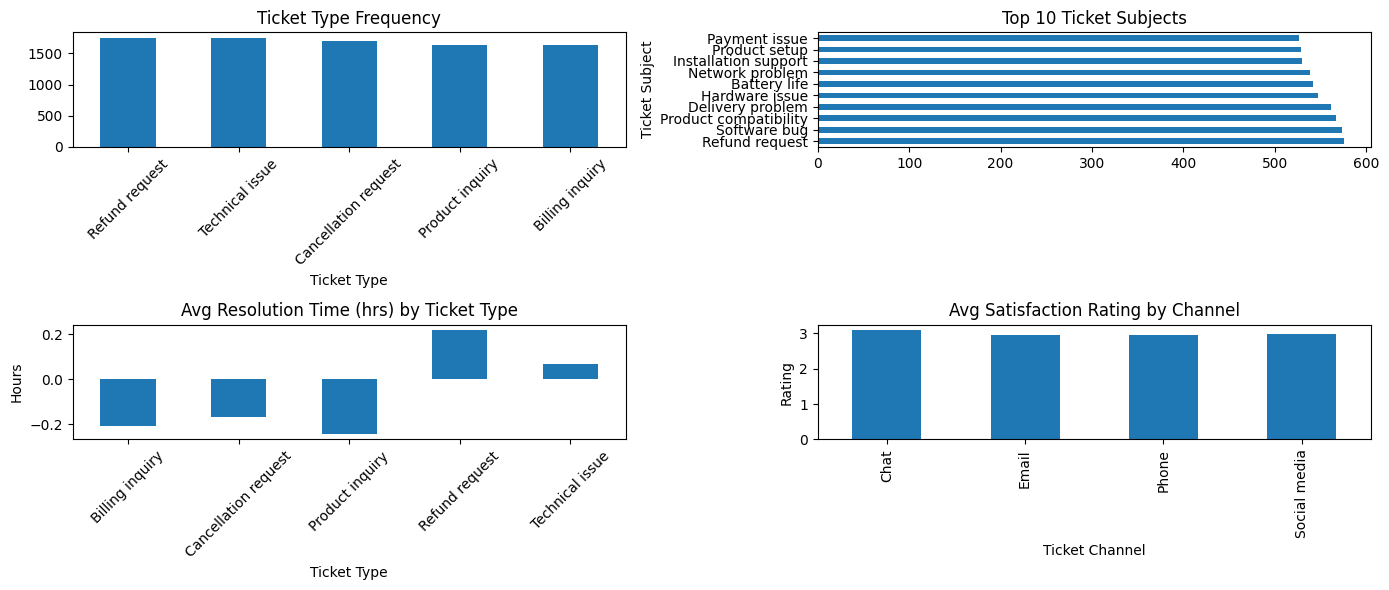

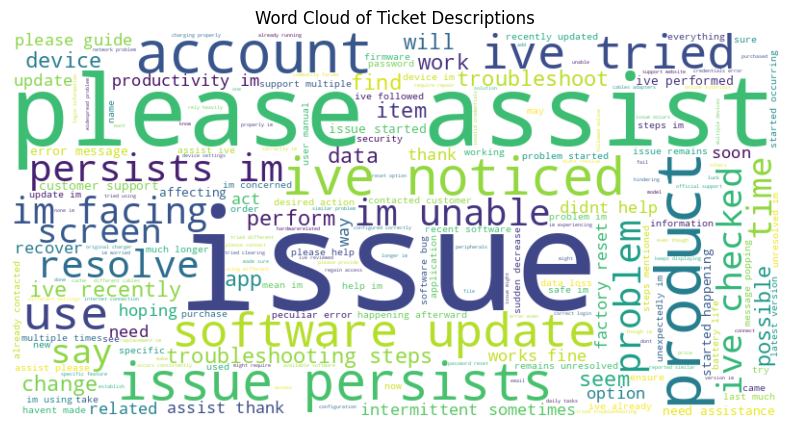

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Load dataset
df = pd.read_csv("customer_support_tickets.csv")

# Basic text cleaning function (no NLTK)
def clean_text(text):
    text = str(text)
    text = re.sub(r'\{.*?\}', '', text)  # Remove placeholders like {product}
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    return text

df['Cleaned_Description'] = df['Ticket Description'].apply(clean_text)

# Convert time columns to datetime
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')

# Calculate resolution time in hours
df['Resolution Time (hrs)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

# Summary stats
ticket_type_counts = df['Ticket Type'].value_counts()
subject_counts = df['Ticket Subject'].value_counts().head(10)
avg_resolution_by_type = df.groupby('Ticket Type')['Resolution Time (hrs)'].mean().dropna()
avg_rating_by_channel = df.groupby('Ticket Channel')['Customer Satisfaction Rating'].mean().dropna()

# Word Cloud
text = " ".join(desc for desc in df['Cleaned_Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
ticket_type_counts.plot(kind='bar', title='Ticket Type Frequency')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
subject_counts.plot(kind='barh', title='Top 10 Ticket Subjects')

plt.subplot(2, 2, 3)
avg_resolution_by_type.plot(kind='bar', title='Avg Resolution Time (hrs) by Ticket Type')
plt.ylabel('Hours')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
avg_rating_by_channel.plot(kind='bar', title='Avg Satisfaction Rating by Channel')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

# Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Ticket Descriptions")
plt.show()
